In [15]:
import pandas as pd
import numpy as np

# 設定隨機種子，確保數據可重現
np.random.seed(42)

# 設定樣本數量
num_samples = 1000

### 1️⃣ 生成 orders.csv 模擬數據 ###
orders_df = pd.DataFrame({
    "customer_id": np.arange(1, num_samples + 1),
    "total_spent": np.random.uniform(10, 500, num_samples),  # 總消費金額
    "purchase_count": np.random.randint(1, 20, num_samples),  # 購買次數
    "last_purchase_days": np.random.randint(1, 365, num_samples),  # 上次購買天數
    "is_email_subscribed": np.random.choice([0, 1], num_samples),  # 訂閱 Email
    "is_sms_subscribed": np.random.choice([0, 1], num_samples),  # 訂閱 SMS
    "membership_tier": np.random.choice(["Regular", "Silver", "Gold"], num_samples)  # 會員等級
})

### 2️⃣ 生成 member.csv 模擬數據 ###
member_df = pd.DataFrame({
    "customer_id": np.arange(1, num_samples + 1),
    "created_by": np.random.choice(["Online", "In-store"], num_samples),  # 註冊方式
    "registered_at": pd.date_range(start="2020-01-01", periods=num_samples, freq="D"),  # 註冊日期
    "gender": np.random.choice(["Male", "Female", "Other"], num_samples),  # 性別
    "birthday": pd.date_range(start="1970-01-01", periods=num_samples, freq="D"),  # 出生日期
    "membership_tier": np.random.choice(["Regular", "Silver", "Gold"], num_samples),  # 會員等級
    "is_sms": np.random.choice([0, 1], num_samples),  # SMS 訂閱
    "is_email": np.random.choice([0, 1], num_samples),  # Email 訂閱
    "is_line": np.random.choice([0, 1], num_samples)  # LINE 訂閱
})

### 3️⃣ 生成 behavior_202207.csv 模擬數據 ###
behavior_df = pd.DataFrame({
    "device_category": np.random.choice(["mobile", "desktop", "tablet"], num_samples),
    "device_mobile_brand_name": np.random.choice(["Apple", "Samsung", "Xiaomi", "Oppo", "Other"], num_samples),
    "device_browser": np.random.choice(["Chrome", "Safari", "Firefox", "Edge"], num_samples),
    "customer_id": np.random.randint(1, num_samples + 1, num_samples),
    "user_pseudo_id": np.random.randint(100000, 999999, num_samples),
    "event_timestamp": pd.date_range(start="2023-07-01", periods=num_samples, freq="H"),
    "device_language": np.random.choice(["en", "zh", "jp", "fr"], num_samples),
    "country": np.random.choice(["Taiwan", "USA", "Japan", "France"], num_samples),
    "source": np.random.choice(["Google", "Facebook", "Direct", "Referral"], num_samples),
    "medium": np.random.choice(["CPC", "Organic", "Social"], num_samples),
    "event_name": np.random.choice(["page_view", "purchase", "add_to_cart"], num_samples),
    "ga_session_number": np.random.randint(1, 1000, num_samples),
    "ga_session_id": np.random.randint(100000, 999999, num_samples),
    "item_id": np.random.randint(1, 10000, num_samples),
    "transaction_id": np.random.choice([np.nan] + list(np.arange(1, num_samples // 2)), num_samples),
    "total_item_quantity": np.random.randint(1, 10, num_samples),
    "unique_items": np.random.randint(1, 5, num_samples),
    "purchase_revenue": np.random.uniform(5, 500, num_samples),
    "partition_date": pd.date_range(start="2023-07-01", periods=num_samples, freq="D").strftime("%Y-%m-%d"),
    "partition_month": "2023-07"
})

# 儲存為 CSV 文件
orders_df.to_csv("mock_orders.csv", index=False)
member_df.to_csv("mock_member.csv", index=False)
behavior_df.to_csv("mock_behavior_202207.csv", index=False)

print("✅ 模擬數據已成功生成：orders.csv, member.csv, behavior_202207.csv")



✅ 模擬數據已成功生成：orders.csv, member.csv, behavior_202207.csv


In [16]:
# 讀取 orders.csv
orders_df = pd.read_csv("C:/Users/b0983/Downloads/mock_orders.csv")
orders_df.head()


,customer_id,total_spent,purchase_count,last_purchase_days,is_email_subscribed,is_sms_subscribed,membership_tier
0,1,193.524658,15,266,1,1,Silver
1,2,475.850010,12,149,0,0,Gold
2,3,368.677031,16,164,1,0,Gold
3,4,303.342657,19,140,0,1,Gold
4,5,86.449134,8,347,0,1,Silver


In [17]:
# 讀取 member.csv
member_df = pd.read_csv("C:/Users/b0983/Downloads/mock_member.csv")
member_df.head()


,customer_id,created_by,registered_at,gender,birthday,membership_tier,is_sms,is_email,is_line
0,1,In-store,2020-01-01,Male,1970-01-01,Silver,1,0,1
1,2,In-store,2020-01-02,Female,1970-01-02,Silver,1,0,1
2,3,Online,2020-01-03,Male,1970-01-03,Silver,0,0,0
3,4,In-store,2020-01-04,Female,1970-01-04,Gold,1,1,0
4,5,In-store,2020-01-05,Male,1970-01-05,Silver,0,0,1


In [18]:
# 讀取 behavior_202207.csv
behavior_df = pd.read_csv("C:/Users/b0983/Downloads/mock_behavior_202207.csv")
behavior_df.head()


,device_category,device_mobile_brand_name,device_browser,customer_id,user_pseudo_id,event_timestamp,device_language,country,source,medium,event_name,ga_session_number,ga_session_id,item_id,transaction_id,total_item_quantity,unique_items,purchase_revenue,partition_date,partition_month
0,desktop,Samsung,Safari,763,734157,2023-07-01 00:00:00,en,Japan,Google,Social,page_view,309,662143,8897,481.0,3,2,270.968578,2023-07-01,2023-07
1,mobile,Samsung,Firefox,594,688730,2023-07-01 01:00:00,zh,Japan,Referral,Organic,page_view,262,756820,9534,24.0,4,3,461.996810,2023-07-02,2023-07
2,mobile,Apple,Edge,566,885313,2023-07-01 02:00:00,en,Japan,Referral,CPC,page_view,293,595407,3463,464.0,5,3,300.208017,2023-07-03,2023-07
3,mobile,Other,Chrome,752,252842,2023-07-01 03:00:00,jp,Japan,Referral,Social,page_view,770,671934,1160,436.0,8,2,485.967049,2023-07-04,2023-07
4,mobile,Other,Chrome,878,467390,2023-07-01 04:00:00,zh,France,Direct,CPC,purchase,249,534468,4627,32.0,7,1,72.543304,2023-07-05,2023-07


In [19]:
# 假設 orders_df 和 member_df 有共同欄位 'customer_id'
merged_df = pd.merge(orders_df, member_df, on='customer_id', how='inner')

# 假設 merged_df 和 behavior_df 有共同欄位 'customer_id'
final_df = pd.merge(merged_df, behavior_df, on='customer_id', how='inner')


In [20]:
# 合併 orders_df 和 member_df，假設 customer_id 和 member_id 一致
merged_orders_members_df = pd.merge(orders_df, member_df, left_on='customer_id', right_on='customer_id', how='inner')

# 合併 merged_orders_members_df 和 behavior_df
final_df = pd.merge(merged_orders_members_df, behavior_df, on='customer_id', how='inner')

display(final_df)


,customer_id,total_spent,purchase_count,last_purchase_days,is_email_subscribed,is_sms_subscribed,membership_tier_x,created_by,registered_at,gender,...,event_name,ga_session_number,ga_session_id,item_id,transaction_id,total_item_quantity,unique_items,purchase_revenue,partition_date,partition_month
0,1,193.524658,15,266,1,1,Silver,In-store,2020-01-01,Male,...,purchase,616,861319,9697,420.0,4,2,485.881150,2025-01-30,2023-07
1,1,193.524658,15,266,1,1,Silver,In-store,2020-01-01,Male,...,page_view,979,747958,124,66.0,9,1,355.809074,2025-10-10,2023-07
2,2,475.850010,12,149,0,0,Gold,In-store,2020-01-02,Female,...,purchase,547,465330,7750,150.0,5,1,127.629401,2023-08-23,2023-07
3,3,368.677031,16,164,1,0,Gold,Online,2020-01-03,Male,...,purchase,763,418316,4368,267.0,7,3,367.458924,2024-06-27,2023-07
4,3,368.677031,16,164,1,0,Gold,Online,2020-01-03,Male,...,purchase,169,488690,8754,482.0,9,4,14.271495,2024-07-18,2023-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,999,475.616303,9,164,0,0,Regular,In-store,2022-09-25,Female,...,add_to_cart,743,228773,3944,178.0,4,1,306.541565,2023-09-13,2023-07
996,999,475.616303,9,164,0,0,Regular,In-store,2022-09-25,Female,...,page_view,538,178944,4418,276.0,8,4,188.740528,2024-01-20,2023-07
997,999,475.616303,9,164,0,0,Regular,In-store,2022-09-25,Female,...,add_to_cart,640,984801,5030,122.0,7,3,218.807045,2025-12-27,2023-07
998,1000,228.542829,18,35,1,1,Gold,Online,2022-09-26,Other,...,add_to_cart,798,730734,1086,275.0,1,2,15.816432,2024-03-11,2023-07


In [23]:
#將合併資料輸出
output_path = r"C:\Users\b0983\Downloads\merged_data.csv"
final_df.to_csv(output_path, index=False, encoding='utf-8-sig')

In [24]:
#查看個欄位類別數
categorical_columns = [colname for colname in final_df.columns if final_df[colname].dtype == "object"]

for col in categorical_columns:
    print("# unique values in '{0}': {1}".format(col, len(final_df[col].unique().tolist())))

# unique values in 'membership_tier_x': 3
# unique values in 'created_by': 2
# unique values in 'registered_at': 628
# unique values in 'gender': 3
# unique values in 'birthday': 628
# unique values in 'membership_tier_y': 3
# unique values in 'device_category': 3
# unique values in 'device_mobile_brand_name': 5
# unique values in 'device_browser': 4
# unique values in 'event_timestamp': 1000
# unique values in 'device_language': 4
# unique values in 'country': 4
# unique values in 'source': 4
# unique values in 'medium': 3
# unique values in 'event_name': 3
# unique values in 'partition_date': 1000
# unique values in 'partition_month': 1


In [26]:
print(final_df.columns)


Index(['customer_id', 'total_spent', 'purchase_count', 'last_purchase_days',
       'is_email_subscribed', 'is_sms_subscribed', 'membership_tier_x',
       'created_by', 'registered_at', 'gender', 'birthday',
       'membership_tier_y', 'is_sms', 'is_email', 'is_line', 'device_category',
       'device_mobile_brand_name', 'device_browser', 'user_pseudo_id',
       'event_timestamp', 'device_language', 'country', 'source', 'medium',
       'event_name', 'ga_session_number', 'ga_session_id', 'item_id',
       'transaction_id', 'total_item_quantity', 'unique_items',
       'purchase_revenue', 'partition_date', 'partition_month'],
      dtype='object')


C:\Users\b0983\AppData\Local\Temp\ipykernel_17216\3951007723.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="created_by", palette="Set2")


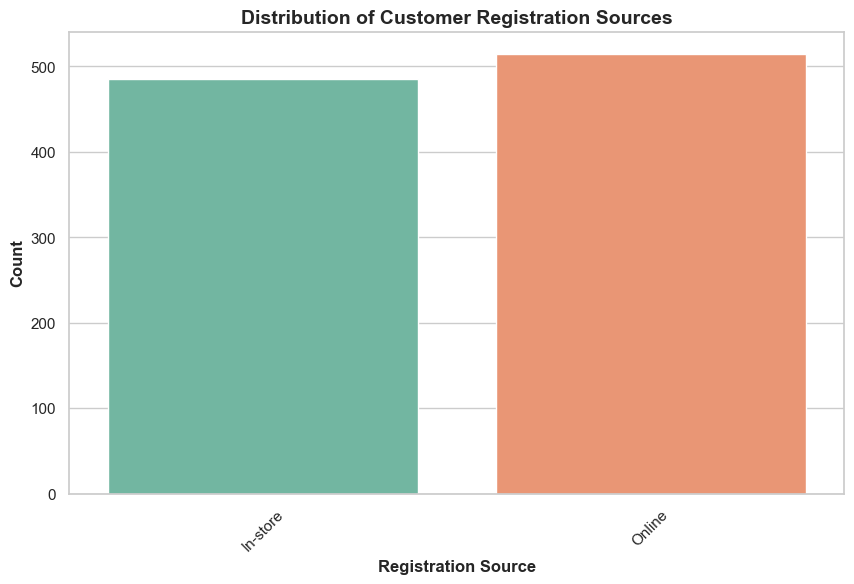

C:\Users\b0983\AppData\Local\Temp\ipykernel_17216\3951007723.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="membership_tier_x", palette="coolwarm")


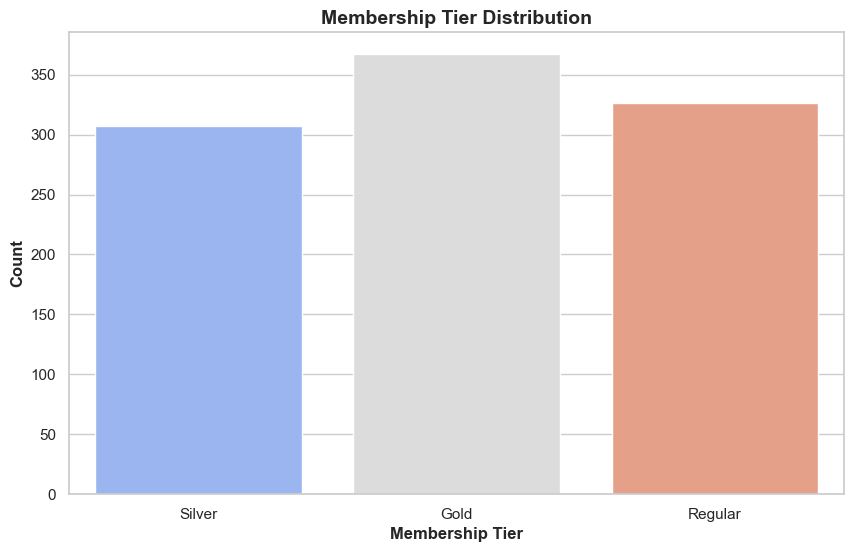

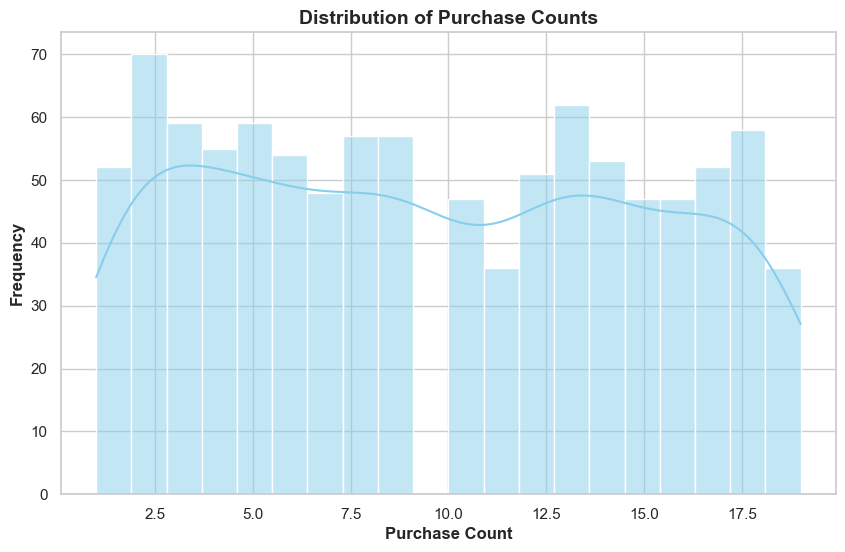

C:\Users\b0983\AppData\Local\Temp\ipykernel_17216\3951007723.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="device_category", palette="viridis")


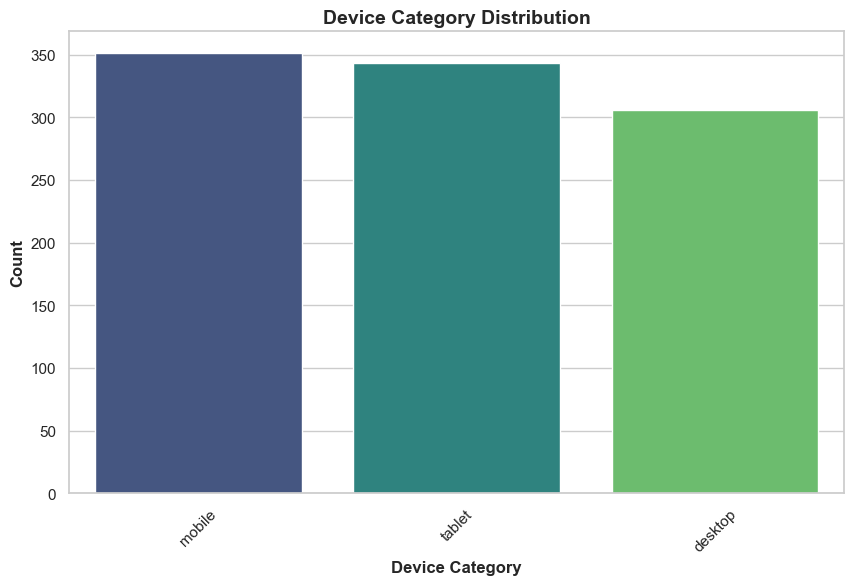

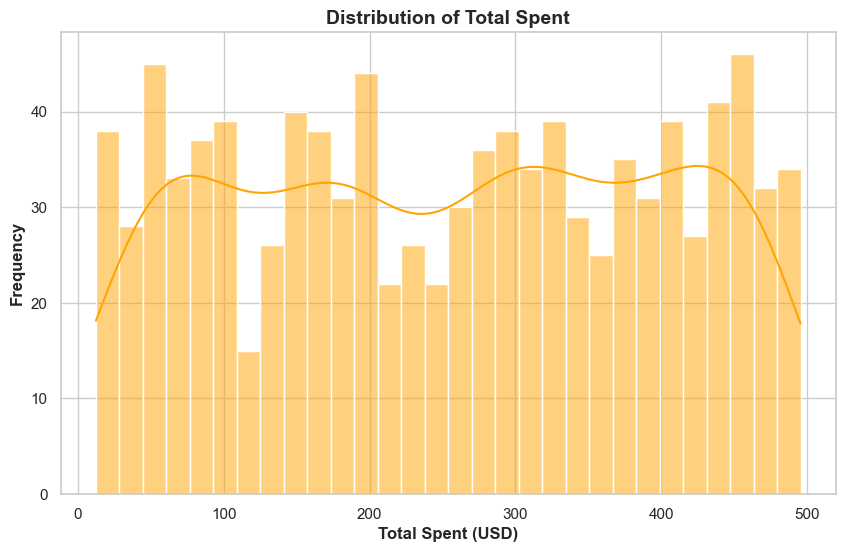

In [27]:
#視覺化
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 設定 Seaborn 風格
sns.set(style="whitegrid")

# 指定正確的 DataFrame
df = final_df  # 確保 final_df 是你的數據框架

# 設定畫布大小
plt.figure(figsize=(10, 6), dpi=100)

# 會員註冊來源 (created_by)
sns.countplot(data=df, x="created_by", palette="Set2")
plt.xlabel("Registration Source", fontsize=12, fontweight="bold")
plt.ylabel("Count", fontsize=12, fontweight="bold")
plt.title("Distribution of Customer Registration Sources", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)  # 旋轉 X 軸標籤
plt.show()

# 會員等級 (membership_tier)
plt.figure(figsize=(10, 6), dpi=100)
sns.countplot(data=df, x="membership_tier_x", palette="coolwarm")
plt.xlabel("Membership Tier", fontsize=12, fontweight="bold")
plt.ylabel("Count", fontsize=12, fontweight="bold")
plt.title("Membership Tier Distribution", fontsize=14, fontweight="bold")
plt.show()

# 購買次數分佈 (purchase_count)
plt.figure(figsize=(10, 6), dpi=100)
sns.histplot(df["purchase_count"], bins=20, kde=True, color="skyblue")
plt.xlabel("Purchase Count", fontsize=12, fontweight="bold")
plt.ylabel("Frequency", fontsize=12, fontweight="bold")
plt.title("Distribution of Purchase Counts", fontsize=14, fontweight="bold")
plt.show()

# 設備類型 (device_category)
plt.figure(figsize=(10, 6), dpi=100)
sns.countplot(data=df, x="device_category", palette="viridis")
plt.xlabel("Device Category", fontsize=12, fontweight="bold")
plt.ylabel("Count", fontsize=12, fontweight="bold")
plt.title("Device Category Distribution", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.show()

# 總消費金額 (total_spent)
plt.figure(figsize=(10, 6), dpi=100)
sns.histplot(df["total_spent"], bins=30, kde=True, color="orange")
plt.xlabel("Total Spent (USD)", fontsize=12, fontweight="bold")
plt.ylabel("Frequency", fontsize=12, fontweight="bold")
plt.title("Distribution of Total Spent", fontsize=14, fontweight="bold")
plt.show()



C:\Users\b0983\AppData\Local\Temp\ipykernel_17216\3931840000.py:13: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=filtered_df, x="event_name", hue="created_by", palette=colors)


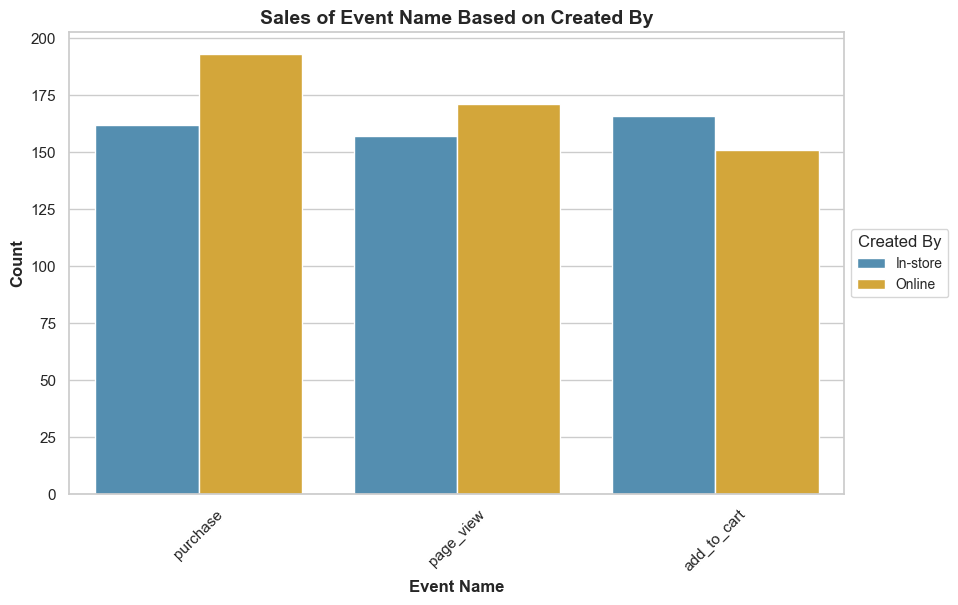

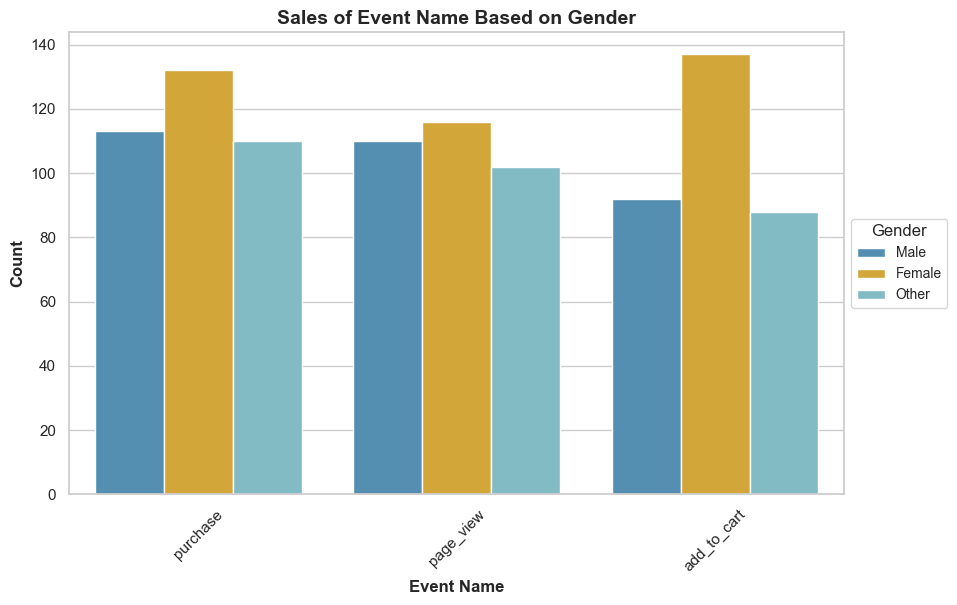

In [28]:

# 設定顏色調色盤
colors = ["#4492C0", "#EDB120", "#78C3D0"]
sns.set(style="whitegrid")

# 過濾 NaN 值，避免 Seaborn 報錯
filtered_df = final_df.dropna(subset=["event_name", "created_by", "gender"])

# 繪製根據 created_by 的計數圖
plt.figure(figsize=(10, 6), dpi=100)
sns.countplot(data=filtered_df, x="event_name", hue="created_by", palette=colors)
plt.xlabel("Event Name", fontsize=12, fontweight="bold")
plt.ylabel("Count", fontsize=12, fontweight="bold")
plt.title("Sales of Event Name Based on Created By", fontsize=14, fontweight="bold")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="Created By", title_fontsize="12", fontsize="10")
plt.xticks(rotation=45)
plt.show()

# 繪製根據 gender 的計數圖
plt.figure(figsize=(10, 6), dpi=100)
sns.countplot(data=filtered_df, x="event_name", hue="gender", palette=colors)
plt.xlabel("Event Name", fontsize=12, fontweight="bold")
plt.ylabel("Count", fontsize=12, fontweight="bold")
plt.title("Sales of Event Name Based on Gender", fontsize=14, fontweight="bold")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="Gender", title_fontsize="12", fontsize="10")
plt.xticks(rotation=45)
plt.show()



C:\Users\b0983\AppData\Local\Temp\ipykernel_17216\2049042840.py:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = final_df[existing_continuous_vars].corr()


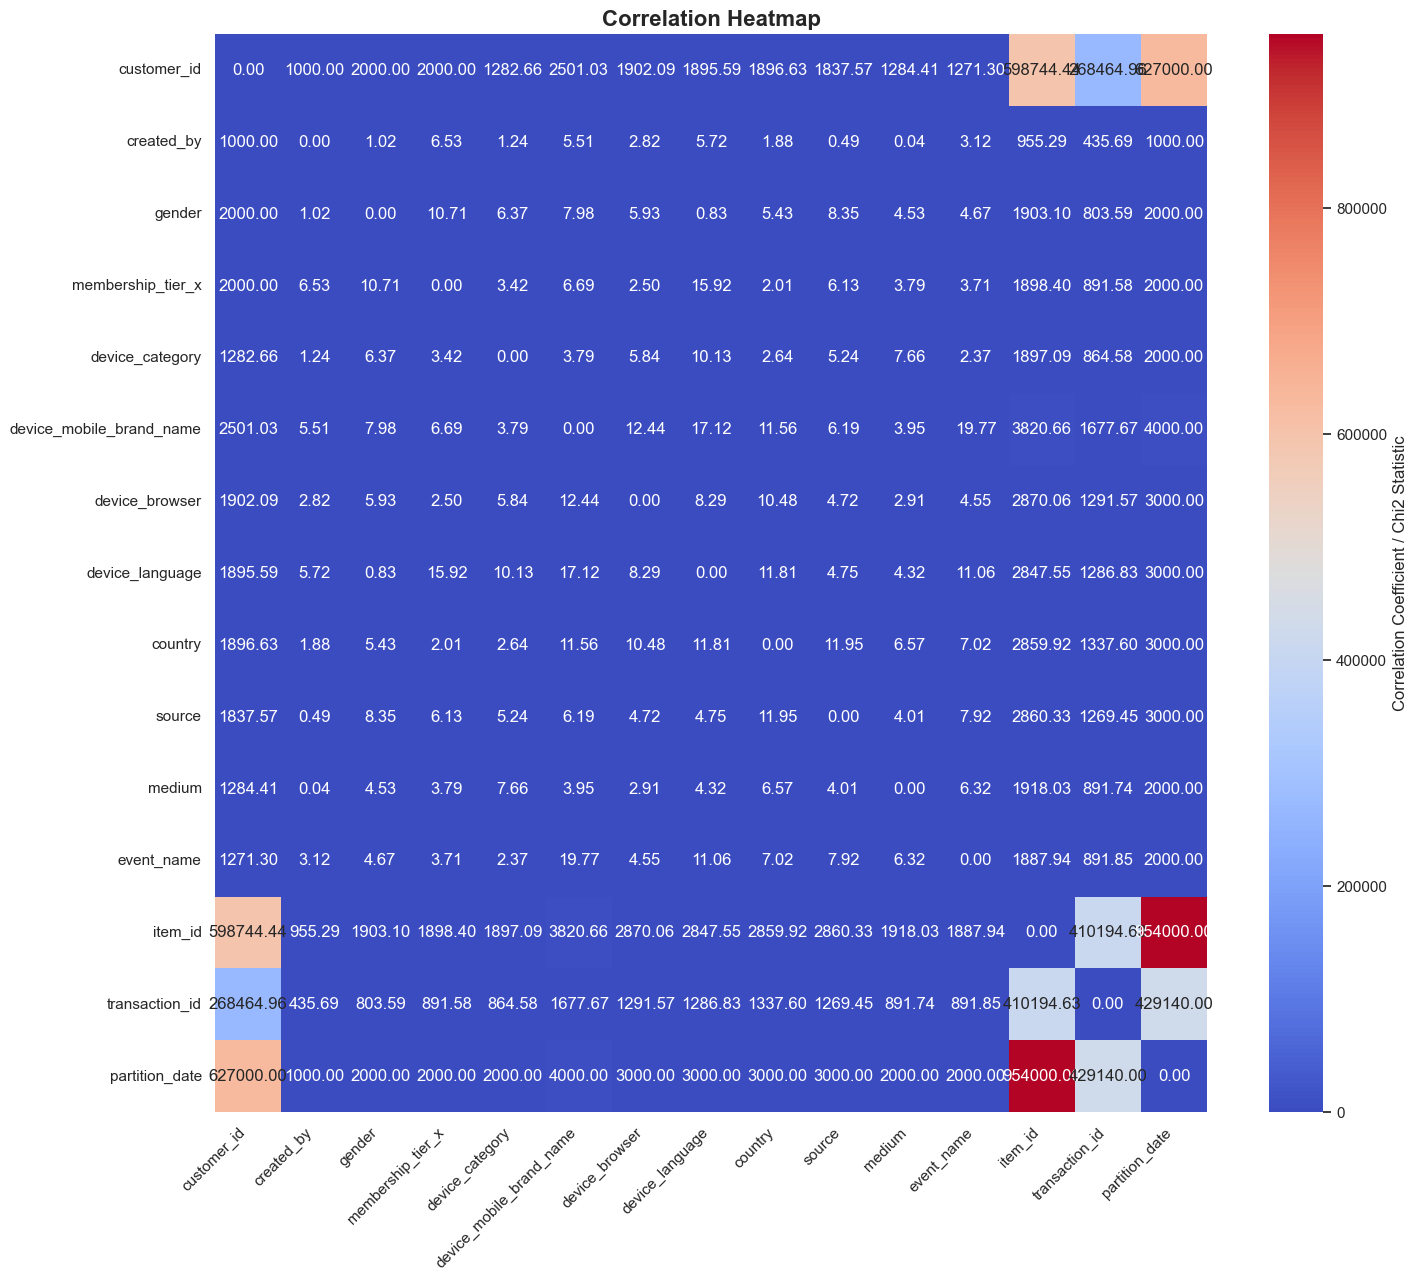

In [31]:
#繪製熱點圖
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 假設 final_df 已經存在並包含所需欄位
continuous_vars = ['created_at', 'updated_at', 'registered_at', 'event_timestamp', 'birthday']
categorical_vars = ['customer_id', 'created_by', 'channel_created_by_channel_name', 'order_payment_type', 'sku',
                    'item_variation_id', 'gender', 'membership_tier_x', 'device_category',
                    'device_mobile_brand_name', 'device_browser', 'device_language', 'country', 'source', 'medium',
                    'event_name', 'item_id', 'transaction_id', 'partition_date']

# **✅ 過濾掉 `final_df` 中不存在的欄位**
existing_continuous_vars = [var for var in continuous_vars if var in final_df.columns]
existing_categorical_vars = [var for var in categorical_vars if var in final_df.columns]

# 確保日期類型欄位轉換為 Unix 時間戳
for var in existing_continuous_vars:
    if pd.api.types.is_datetime64_any_dtype(final_df[var]):
        final_df[var] = final_df[var].view('int64') // 10**9  # 轉換為秒級 Unix 時間戳

# 計算連續變量之間的皮爾遜相關係數
corr_matrix = final_df[existing_continuous_vars].corr()

# 創建一個空的 DataFrame 來存放卡方檢定結果
chi2_matrix = pd.DataFrame(np.nan, index=existing_categorical_vars, columns=existing_categorical_vars)

# 計算類別變數之間的卡方相關性
for var1 in existing_categorical_vars:
    for var2 in existing_categorical_vars:
        if var1 != var2:
            contingency_table = pd.crosstab(final_df[var1], final_df[var2])
            if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:  # 確保表格足夠大
                chi2, _, _, _ = chi2_contingency(contingency_table)
                chi2_matrix.loc[var1, var2] = chi2
                chi2_matrix.loc[var2, var1] = chi2

# 合併連續變量與類別變量之間的相關性
for var1 in existing_continuous_vars:
    for var2 in existing_categorical_vars:
        try:
            contingency_table = pd.crosstab(final_df[var2], pd.qcut(final_df[var1], q=10, duplicates='drop'))
            if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
                chi2, _, _, _ = chi2_contingency(contingency_table)
                chi2_matrix.loc[var1, var2] = chi2
                chi2_matrix.loc[var2, var1] = chi2
        except Exception:
            continue  # 如果發生錯誤（例如無法分桶），則跳過

# 合併數據框
final_corr_matrix = pd.concat([corr_matrix, chi2_matrix], axis=1).fillna(0)

# 繪製熱點圖
plt.figure(figsize=(16, 14))
sns.heatmap(final_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient / Chi2 Statistic'})
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

